In [87]:
import numpy as np
import matplotlib.pyplot as plt

In [88]:
def plot_signal(signal: np.ndarray):
    plt.grid(visible=True)
    plt.scatter(np.arange(len(signal)), signal)
    plt.ylim((-4, 4))
    plt.show()

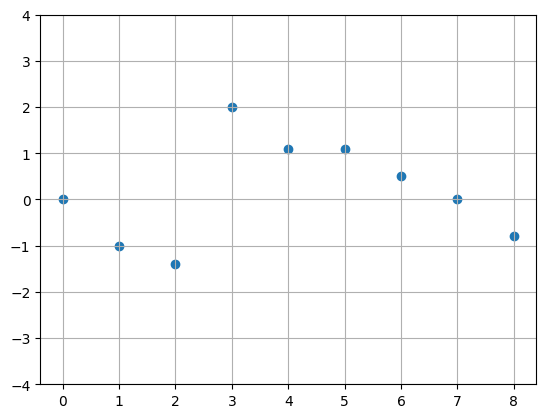

In [89]:
# x[n] is the input signal
x = np.array([0, -1, -1.4, 2, 1.1, 1.1, 0.5, 0, -0.8])
plot_signal(x)

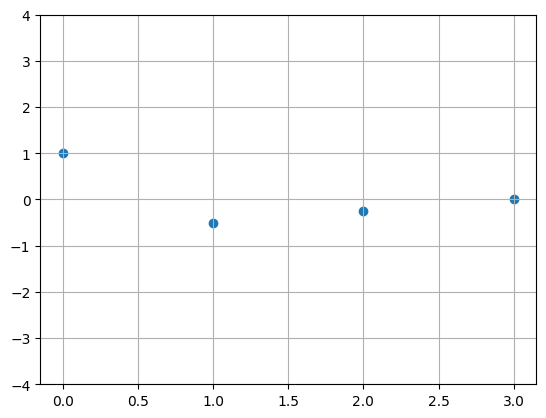

In [90]:
# h[n] is the impulse response
h = np.array([1, -0.5, -0.25, 0])
plot_signal(h)

## Input-Side Algorithm

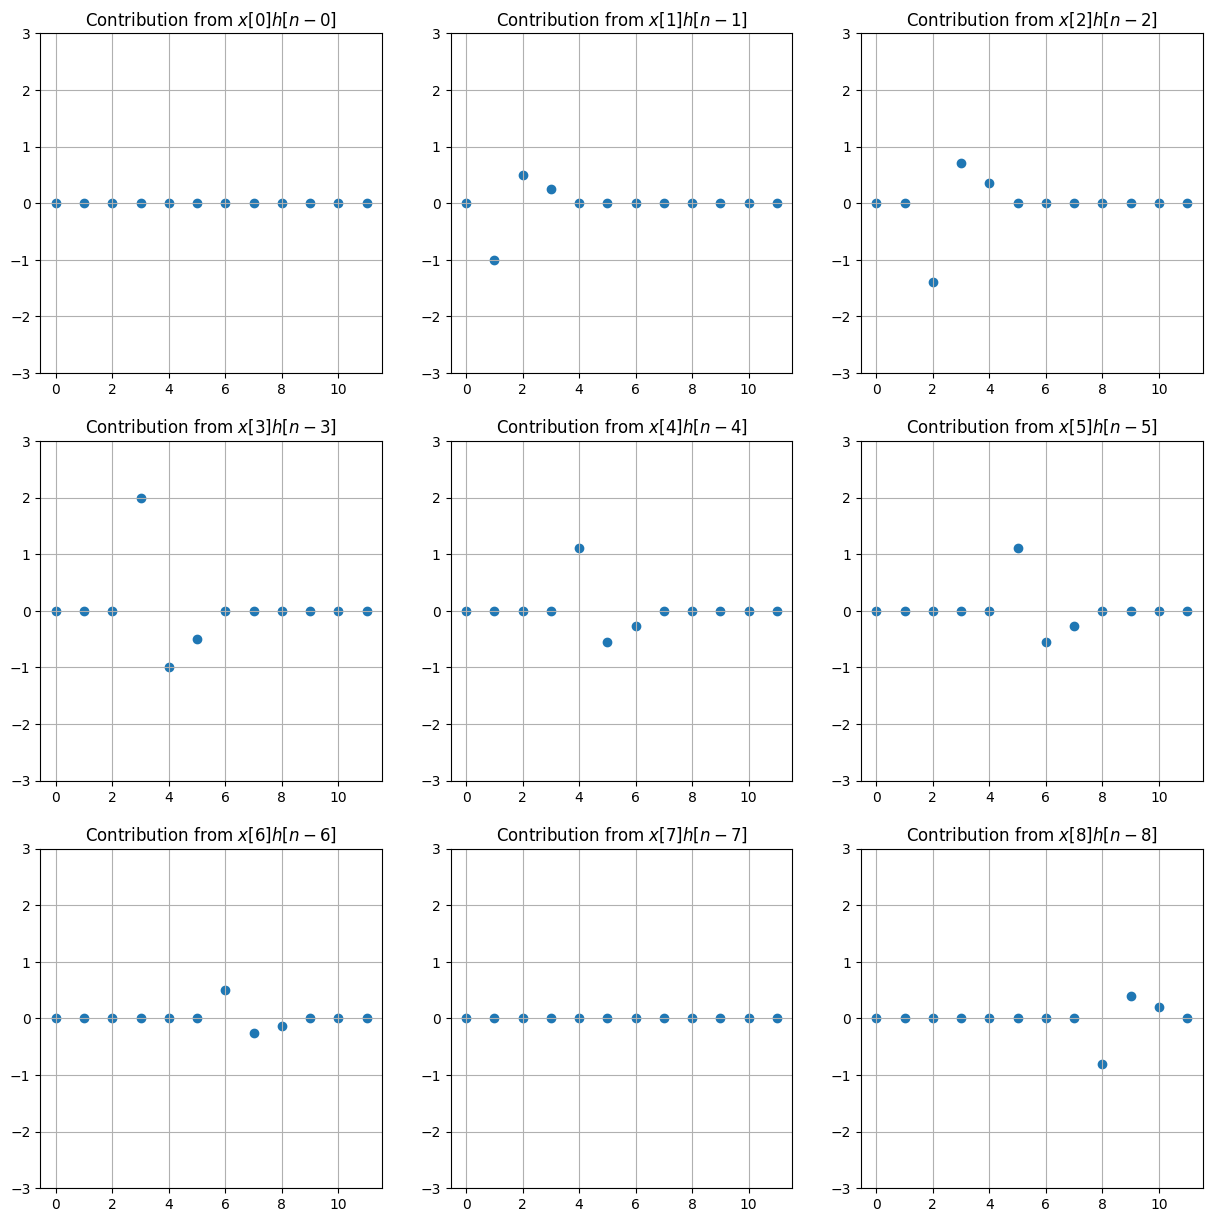

In [91]:
# input-side convolution (loop through the input samples)
nrows, ncols = 3, 3
fig, axs = plt.subplots(nrows, ncols)
fig.set_figheight(15)
fig.set_figwidth(15)

flat_line = np.zeros(len(x) + len(h) - 1)
y1 = np.zeros_like(flat_line)  # the output signal, i.e. x[n] convolved with h[n] to produce y[n]
for i, sample in enumerate(x):
    contribution = flat_line.copy()
    contribution[i: i + len(h)] += sample * h
    axs[indices := divmod(i, 3)].scatter(np.arange(len(contribution)), contribution)
    axs[indices].set_title(f"Contribution from $x[{i}]h[n-{i}]$")
    axs[indices].grid(visible=True)
    axs[indices].set_ylim([-3, 3])
    y1 += contribution
plt.show()

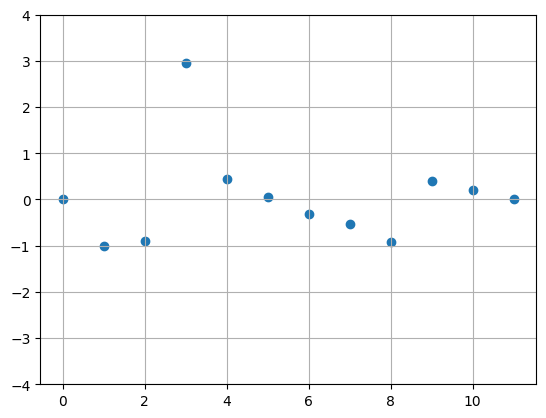

In [92]:
# display the final convolution x[n] * h[n] = y[n]
plot_signal(y1)

## Output-Side Algorithm

$y[i] = \sum_{j=0}^{M-1}{h[j]x[i-j]}$ for $i \in [0 \ldots N+M-2]$

Note, that we pad $x$ with $M - 1$ zeros on the left and right of the signal. When we index this padded signal $x_p$, we still write $x[-M + 1]$ to mean $x_p[0]$. Fro example, if we pad $x$ with $3$ zeros on the left and right, then $x[-3] = x_p[0]$.

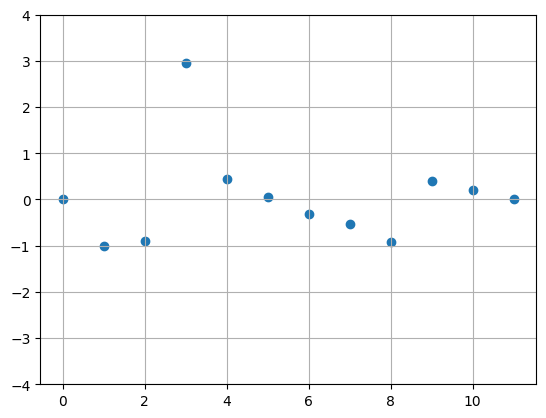

In [104]:
# output-side convolution (loop through the output samples)
# NOTE: y1 and y2 are the same, just calculated with different methods
N = len(x)
M = len(h)
padded_x = np.pad(x, (M - 1, M - 1), constant_values=(0, 0))
y2 = np.zeros_like(y1)
for i in range(N + M - 1):
    y2[i] = np.sum([h[j] * padded_x[(i - j) + M - 1] for j in range(M)])
plot_signal(y2)

The main difference between the input-side and output-side algorithms is the input-side algorithm loops through each sample in the input signal, while the output-side algorithm loops through each sample in the output signal.

In [106]:
np.all(y1 == y2)

True

Reference:

Smith, S. W. (1997). *The Scientist and Engineer's Guide to Digital Signal Processing.* California Technical Publishing.
